In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('earthquake_dataset.csv')

In [3]:
df.head()

,Day,Month,Time,Latitude(ÂºN),Longitude(ÂºE),Depth(km),Mag,Distance(km),City,Province,Zip Code,Richter Category,Day Count,Depth Category,Earthquake Category
0,25,4,1919,8.50,124.42,1,2.4,9,292,53,9019,micro,115,0,2
1,25,4,1813,18.13,120.81,27,2.1,5,124,37,2911,micro,115,1,1
2,25,4,1808,14.71,121.78,8,2.5,15,251,68,2412,micro,115,0,2
3,25,4,1706,5.64,126.33,105,2.9,82,267,30,8014,micro,115,1,3
4,25,4,1647,8.07,126.71,29,3.9,33,314,81,8312,minor,115,1,3


In [4]:
mag_range = df['Mag'].max() - df['Mag'].min()
print("Range values of magnitude column: ", mag_range)

Range values of magnitude column:  6.4


In [5]:
df['Mag'].min()

1.1

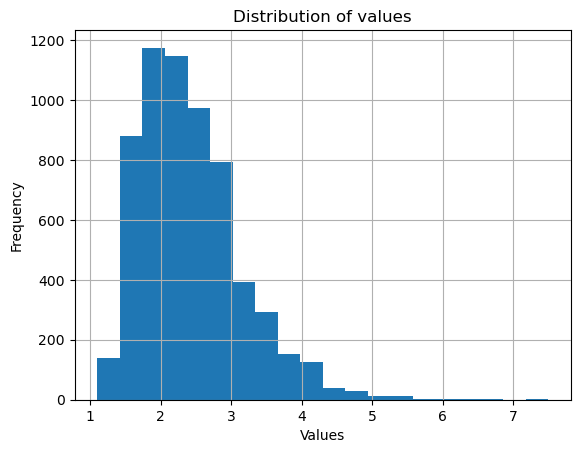

In [6]:
import matplotlib.pyplot as plt

df['Mag'].hist(bins=20)  # Adjust bins as needed for better visualization
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Distribution of values')
plt.grid(True)
plt.show()

In [7]:
df['Mag'].describe()

count    6170.000000
mean        2.416224
std         0.711643
min         1.100000
25%         1.900000
50%         2.300000
75%         2.800000
max         7.500000
Name: Mag, dtype: float64

We will use the 25% 50% and 75% as our point of reference to separate our magnitude into four parts with their categories.

In [8]:
df.head()

,Day,Month,Time,Latitude(ÂºN),Longitude(ÂºE),Depth(km),Mag,Distance(km),City,Province,Zip Code,Richter Category,Day Count,Depth Category,Earthquake Category
0,25,4,1919,8.50,124.42,1,2.4,9,292,53,9019,micro,115,0,2
1,25,4,1813,18.13,120.81,27,2.1,5,124,37,2911,micro,115,1,1
2,25,4,1808,14.71,121.78,8,2.5,15,251,68,2412,micro,115,0,2
3,25,4,1706,5.64,126.33,105,2.9,82,267,30,8014,micro,115,1,3
4,25,4,1647,8.07,126.71,29,3.9,33,314,81,8312,minor,115,1,3


In [9]:
def getRichter(magnitude):
    if (magnitude < 1.9):
        return 0
    elif (magnitude < 2.3):
        return 1
    elif (magnitude < 2.8):
        return 2
    else:
        return 3

In [10]:
df['Earthquake Category'] = 0
df.head()

,Day,Month,Time,Latitude(ÂºN),Longitude(ÂºE),Depth(km),Mag,Distance(km),City,Province,Zip Code,Richter Category,Day Count,Depth Category,Earthquake Category
0,25,4,1919,8.50,124.42,1,2.4,9,292,53,9019,micro,115,0,0
1,25,4,1813,18.13,120.81,27,2.1,5,124,37,2911,micro,115,1,0
2,25,4,1808,14.71,121.78,8,2.5,15,251,68,2412,micro,115,0,0
3,25,4,1706,5.64,126.33,105,2.9,82,267,30,8014,micro,115,1,0
4,25,4,1647,8.07,126.71,29,3.9,33,314,81,8312,minor,115,1,0


In [11]:
for index, row in df.iterrows():
    df.loc[index, 'Earthquake Category'] = getRichter(row['Mag'])
df.head(23)

,Day,Month,Time,Latitude(ÂºN),Longitude(ÂºE),Depth(km),Mag,Distance(km),City,Province,Zip Code,Richter Category,Day Count,Depth Category,Earthquake Category
0,25,4,1919,8.50,124.42,1,2.4,9,292,53,9019,micro,115,0,2
1,25,4,1813,18.13,120.81,27,2.1,5,124,37,2911,micro,115,1,1
2,25,4,1808,14.71,121.78,8,2.5,15,251,68,2412,micro,115,0,2
3,25,4,1706,5.64,126.33,105,2.9,82,267,30,8014,micro,115,1,3
4,25,4,1647,8.07,126.71,29,3.9,33,314,81,8312,minor,115,1,3
5,25,4,1450,7.81,125.07,11,4.0,7,361,17,8714,light,115,0,3
6,25,4,1416,12.40,125.71,9,2.4,33,491,33,6821,micro,115,0,2
7,25,4,1302,11.86,125.94,27,2.5,53,208,33,2801,micro,115,1,2
8,25,4,2444,7.77,127.18,13,3.2,72,39,31,8204,minor,115,0,3
9,25,4,2436,7.80,127.15,15,2.6,70,39,31,8204,micro,115,0,2


In [12]:
df.head()

,Day,Month,Time,Latitude(ÂºN),Longitude(ÂºE),Depth(km),Mag,Distance(km),City,Province,Zip Code,Richter Category,Day Count,Depth Category,Earthquake Category
0,25,4,1919,8.50,124.42,1,2.4,9,292,53,9019,micro,115,0,2
1,25,4,1813,18.13,120.81,27,2.1,5,124,37,2911,micro,115,1,1
2,25,4,1808,14.71,121.78,8,2.5,15,251,68,2412,micro,115,0,2
3,25,4,1706,5.64,126.33,105,2.9,82,267,30,8014,micro,115,1,3
4,25,4,1647,8.07,126.71,29,3.9,33,314,81,8312,minor,115,1,3


In [13]:
data = df

In [14]:
print(data.shape)  #display the dataset dimension

(6170, 15)


In [15]:
data.dtypes  #display the data types

Day                      int64
Month                    int64
Time                     int64
Latitude(ÂºN)          float64
Longitude(ÂºE)         float64
Depth(km)                int64
Mag                    float64
Distance(km)             int64
City                     int64
Province                 int64
Zip Code                 int64
Richter Category        object
Day Count                int64
Depth Category           int64
Earthquake Category      int64
dtype: object

In [16]:
data.info()  #display the data structures

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6170 entries, 0 to 6169
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Day                  6170 non-null   int64  
 1   Month                6170 non-null   int64  
 2   Time                 6170 non-null   int64  
 3   Latitude(ÂºN)        6170 non-null   float64
 4   Longitude(ÂºE)       6170 non-null   float64
 5   Depth(km)            6170 non-null   int64  
 6   Mag                  6170 non-null   float64
 7   Distance(km)         6170 non-null   int64  
 8   City                 6170 non-null   int64  
 9   Province             6170 non-null   int64  
 10  Zip Code             6170 non-null   int64  
 11  Richter Category     6170 non-null   object 
 12  Day Count            6170 non-null   int64  
 13  Depth Category       6170 non-null   int64  
 14  Earthquake Category  6170 non-null   int64  
dtypes: float64(3), int64(11), object(1)
me

In [17]:
data.describe()  #display the summarized info of dataset

,Day,Month,Time,Latitude(ÂºN),Longitude(ÂºE),Depth(km),Mag,Distance(km),City,Province,Zip Code,Day Count,Depth Category,Earthquake Category
count,6170.000000,6170.000000,6170.000000,6170.000000,6170.000000,6170.000000,6170.000000,6170.000000,6170.000000,6170.000000,6170.000000,6170.000000,6170.000000,6170.000000
mean,14.431767,2.345543,1230.412642,10.028420,124.899381,28.091410,2.416224,37.751540,267.015883,57.754619,6802.970016,54.230794,0.480227,1.559481
std,8.563833,1.111057,749.904752,3.620895,2.371969,33.602533,0.711643,44.809418,142.661262,26.932841,2257.336497,34.835643,0.499649,1.105892
min,1.000000,1.000000,100.000000,1.930000,118.550000,0.000000,1.100000,0.000000,0.000000,0.000000,1005.000000,0.000000,0.000000,0.000000
25%,7.000000,1.000000,511.250000,8.150000,123.170000,9.000000,1.900000,11.000000,164.000000,31.000000,5107.000000,22.000000,0.000000,1.000000
50%,14.000000,2.000000,1222.000000,8.760000,126.120000,22.000000,2.300000,23.000000,242.000000,73.000000,8210.000000,54.000000,0.000000,2.000000
75%,21.000000,3.000000,1932.000000,11.830000,126.610000,32.000000,2.800000,51.000000,364.000000,81.000000,8311.000000,85.000000,1.000000,3.000000
max,31.000000,4.000000,2459.000000,23.800000,128.440000,543.000000,7.500000,472.000000,588.000000,88.000000,9811.000000,115.000000,1.000000,3.000000


In [18]:
#store in (X)
#store in (y)
X = data.drop(['Earthquake Category', 'Mag',  'Depth(km)', 'Depth Category', 'Richter Category'], axis=1)
y = data['Earthquake Category']

In [19]:
X.columns

Index(['Day', 'Month', 'Time', 'Latitude(ÂºN)', 'Longitude(ÂºE)',
       'Distance(km)', 'City', 'Province', 'Zip Code', 'Day Count'],
      dtype='object')

In [20]:
numerical_features = ['Latitude(ÂºN)', 'Longitude(ÂºE)', 'Distance(km)'];


In [21]:
y

0       2
1       1
2       2
3       3
4       3
       ..
6165    0
6166    1
6167    2
6168    0
6169    1
Name: Earthquake Category, Length: 6170, dtype: int64

In [22]:
from sklearn.model_selection import train_test_split  #import sci-kit learn library to split train & test data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=0)

In [23]:
X_train.shape, y_train.shape  #display X_train and y_train shape

((4319, 10), (4319,))

In [24]:
X_test.shape, y_test.shape  #display X_test and y_test shape

((1851, 10), (1851,))

In [25]:
X_train  #display the X_train

,Day,Month,Time,Latitude(ÂºN),Longitude(ÂºE),Distance(km),City,Province,Zip Code,Day Count
450,16,4,1604,8.27,126.58,28,242,81,8310,106
619,13,4,2005,8.58,126.28,19,68,81,8309,103
1288,29,1,1412,7.76,125.70,3,474,28,1234,28
1928,16,1,2118,8.62,126.87,64,242,81,8310,15
1247,31,1,344,19.92,121.71,49,456,12,3904,30
...,...,...,...,...,...,...,...,...,...,...
4931,25,3,1645,6.46,126.16,23,233,31,8210,84
3264,27,2,158,16.38,121.24,14,54,60,3702,57
1653,21,1,1933,8.20,127.04,72,314,81,8312,20
2607,6,1,1610,6.05,126.44,78,233,31,8210,5


In [26]:
y_train  #display the y_train

450     0
619     0
1288    2
1928    2
1247    2
       ..
4931    1
3264    1
1653    2
2607    0
2732    1
Name: Earthquake Category, Length: 4319, dtype: int64

In [27]:
X_test  #display the X_test

,Day,Month,Time,Latitude(ÂºN),Longitude(ÂºE),Distance(km),City,Province,Zip Code,Day Count
5083,21,3,437,6.55,125.93,20,233,31,8210,80
3847,14,2,1559,8.31,126.62,32,242,81,8310,44
4528,1,2,2032,13.40,121.75,12,78,50,4900,31
2526,7,1,1853,8.74,126.40,13,364,81,8306,6
5349,17,3,105,12.85,122.97,30,173,51,3519,76
...,...,...,...,...,...,...,...,...,...,...
3807,15,2,2300,8.17,126.72,37,314,81,8312,45
6100,2,3,717,2.96,126.58,300,53,55,8015,61
440,16,4,2007,15.62,119.87,6,115,85,2212,106
2689,5,1,1400,19.71,121.56,43,31,19,3520,4


In [28]:
y_test  #display the y_test

5083    2
3847    3
4528    2
2526    1
5349    0
       ..
3807    1
6100    3
440     2
2689    3
4999    0
Name: Earthquake Category, Length: 1851, dtype: int64

In [29]:
X_train.isnull().sum()  #check x_train for null values

Day               0
Month             0
Time              0
Latitude(ÂºN)     0
Longitude(ÂºE)    0
Distance(km)      0
City              0
Province          0
Zip Code          0
Day Count         0
dtype: int64

In [30]:
y_train.isnull().sum()  #check y_train for null values

0

In [31]:
X_test.isnull().sum()  #check x_test for null values

Day               0
Month             0
Time              0
Latitude(ÂºN)     0
Longitude(ÂºE)    0
Distance(km)      0
City              0
Province          0
Zip Code          0
Day Count         0
dtype: int64

In [32]:
y_test.isnull().sum()  #check y_test for null values

0

In [33]:
#import libraries to build the gradient boosting and fit the model
from sklearn.metrics import accuracy_score
from sklearn.ensemble import GradientBoostingClassifier

gb_classifier = GradientBoostingClassifier(n_estimators=50, learning_rate=0.1, max_depth=3,random_state=0)
gb_classifier.fit(X_train, y_train)

#make predictions and store data for later
y_pred_gb = gb_classifier.predict(X_test)

#get the accuracy score
acc_gb = round(accuracy_score(y_test,y_pred_gb)*100,2)

In [34]:
#import libraries to build the decision tree model and fit the model
from sklearn.tree import DecisionTreeClassifier

dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train, y_train)

#make predictions and store data for later
y_pred_dt = dt_classifier.predict(X_test)

#get the accuracy score
acc_dt = round(accuracy_score(y_test,y_pred_dt)*100,2)

In [35]:
#import libraries to build the knn model and fit in the train data
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 3) 
knn.fit(X_train, y_train)

#make predictions and store data for later
y_pred_knn = knn.predict(X_test) 

#get the accuracy score
acc_knn = round(accuracy_score(y_test,y_pred_knn)*100,2)

In [36]:
#import libraries to build the random forest model and fit in the train data
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)

#make predictions and store data for later
y_pred_rf = rf.predict(X_test)

#get the accuracy score
acc_rf = round(accuracy_score(y_test,y_pred_rf)*100,2)

In [37]:
#import libraries to build the Naive Bayes model and fit in the train data
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB() 
gnb.fit(X_train, y_train)  

#make predictions and store data for later
y_pred_gnb = gnb.predict(X_test)  

#get the accuracy score
acc_gnb = round(accuracy_score(y_test,y_pred_gnb)*100,2)

In [38]:
#import libraries for SVM
from sklearn.svm import SVC

svm_classifier = SVC(C=100,kernel='rbf',gamma=1)     
svm_classifier.fit(X_train,y_train)

#make predictions and store data for later
y_pred_svm = svm_classifier.predict(X_test)

#get the accuracy score
acc_svm = round(accuracy_score(y_test,y_pred_svm)*100,2)

In [39]:
#display the accuracy results
results = pd.DataFrame({
    'Model': ['Gradient Boosting','Decision Tree', 'K Nearest Neighbors', 
              'Random Forest', 'Naive Bayes','Support Vector Machine'],
    'Score': [acc_gb, acc_dt, acc_knn, 
              acc_rf, acc_gnb, acc_svm]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(6)

,Model
Score,
39.87,Gradient Boosting
37.93,Random Forest
36.14,Naive Bayes
32.41,Decision Tree
31.44,K Nearest Neighbors
26.85,Support Vector Machine


In [43]:
y_pred_knn  #display prediction

array([2, 0, 1, ..., 0, 1, 2], dtype=int64)

In [44]:
y_test  #display actual values

5083    2
3847    3
4528    2
2526    1
5349    0
       ..
3807    1
6100    3
440     2
2689    3
4999    0
Name: Earthquake Category, Length: 1851, dtype: int64

In [45]:
#import libraries for root-mean-square error
import numpy as np
from sklearn import metrics
from sklearn.metrics import mean_squared_error
import math

#display the root-mean-square error
MSE=np.square(np.subtract(y_test,y_pred_knn)).mean()
RMSE = (math.sqrt(MSE) * 100) 
print(RMSE)

148.70229215105547


In [46]:
#import libraries for confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_rf) 

print ("Confusion Matrix : \n", cm)  #display confusion matrix of multi class classification

Confusion Matrix : 
 [[187 108  84  37]
 [125 133 106  93]
 [ 75 131 158 121]
 [ 42  67 139 245]]


<Axes: xlabel='Predicted Values', ylabel='Actual Values'>

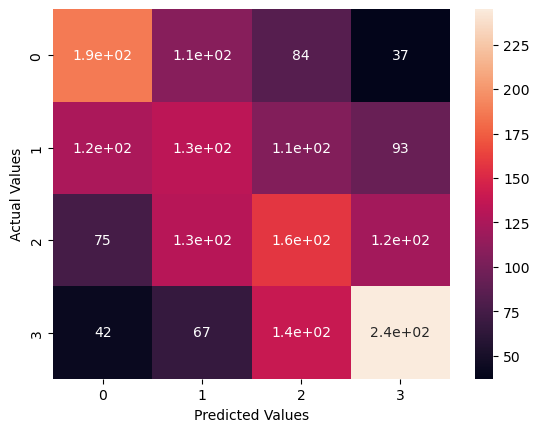

In [47]:
import seaborn as sns  #import package for plotting

#confusion matrix

cm = pd.crosstab(y_test, y_pred_rf, rownames=['Actual Values'], colnames=['Predicted Values'])
sns.heatmap(cm, annot=True)

In [52]:
data['Mag'].describe()

count    6170.000000
mean        2.416224
std         0.711643
min         1.100000
25%         1.900000
50%         2.300000
75%         2.800000
max         7.500000
Name: Mag, dtype: float64